In [31]:
from systems.parse import parse
from systems.viz import as_dot
from IPython.core.display import HTML
import pandas as pd
import matplotlib.pyplot as plt

def render(spec, rounds=10, columns=None):
    model = parse(spec)
    plt.close('all')
    results = model.run(rounds=rounds)[1:]
    df = pd.DataFrame.from_records(results, columns=columns)
    df.cumsum()
    plt.figure();
    return df.plot(figsize=(12, 4));

def dot(spec):
    "Render via graphviz."
    model = parse(spec)
    return as_dot(model)

def table(spec, rounds=10, start=1, stop=None):
    "Shows first five and last five rows."
    model = parse(spec)
    results = model.run(rounds=rounds)[start:stop]
    return HTML(model.render_html(results))

def raw_table(spec, rounds=10):
    "Exportable HTML you could embed somewhere."
    model = parse(spec)
    results = model.run(rounds=rounds)[1:]
    rendered = model.render_html(results)
    return rendered.replace('\n','').replace("<table>", "<table class=\"table table-bordered\">")

def compare(first_spec, second_spec, column, rounds=10):
    "Compare two different specs on a column."
    la, sa = first_spec
    lb, sb = second_spec

    ma = parse(sa)
    ra = ma.run(rounds=rounds)
    ca = [{la: x[column]} for x in ra]

    mb = parse(sb)
    rb = mb.run(rounds=rounds)
    cb = [{lb: x[column]} for x in rb]
    
    rows = []
    for a, b in zip(ca,cb):
        d = {}
        d.update(a)
        d.update(b)
        rows.append(d)

    df = pd.DataFrame.from_records(rows)
    df.cumsum()
    plt.figure()
    return df.plot(figsize=(12, 4))
    
    


Round,PlatformInvestment,Platforms,Deprecated,Progress
0,555,10,91,2957.5
1,560,10,92,3013.0
2,565,10,93,3069.0
3,570,10,94,3125.5
4,575,10,95,3182.5
5,580,10,96,3240.0
6,585,10,97,3298.0
7,590,10,98,3356.5
8,595,10,99,3415.5
9,600,10,100,3475.0


<Figure size 432x288 with 0 Axes>

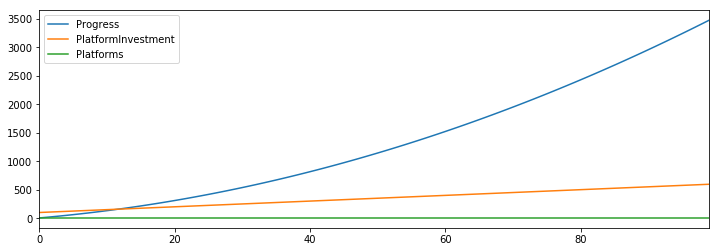

In [41]:
firstspec = """
PlatformInvestment(100)
Platforms(10)
[Potential] > PlatformInvestment @ 5
[Potential] > Progress @ PlatformInvestment / Platforms
"""
rounds=100
render(spec, rounds=rounds, columns=['Progress', 'PlatformInvestment', 'Platforms'])
table(spec, rounds=rounds, start=-10)

Round,PlatformInvestment,Platforms,Progress
0,555,101,572.9204631835681
1,560,102,578.4155126885187
2,565,103,583.90570876695
3,570,104,589.3911456601539
4,575,105,594.8719148909232
5,580,106,600.3481053671137
6,585,107,605.8198034803213
7,590,108,611.2870931999474
8,595,109,616.7500561629104
9,600,110,622.2087717592407


<Figure size 432x288 with 0 Axes>

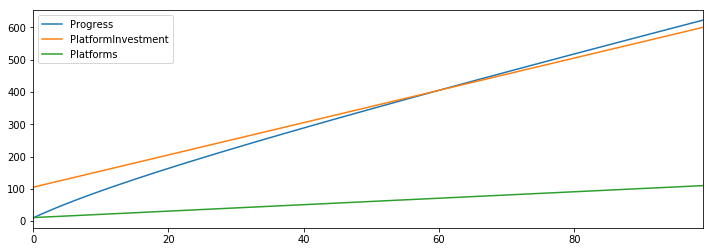

In [38]:
spec = """
PlatformInvestment(100)
Platforms(10)
[Potential] > Platforms @ 1
[Potential] > PlatformInvestment @ 5
[Potential] > Progress @ PlatformInvestment / Platforms
"""
rounds=100
render(spec, rounds=rounds, columns=['Progress', 'PlatformInvestment', 'Platforms'])
table(spec, rounds=rounds, start=-10)

<Figure size 432x288 with 0 Axes>

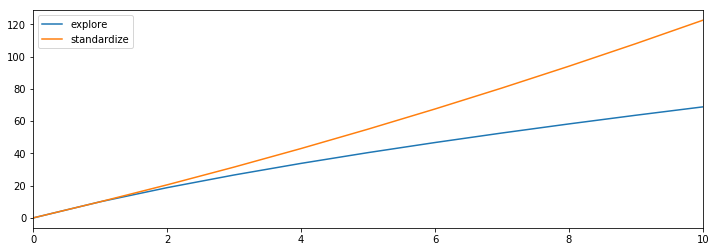

In [39]:
spec_a = """
PlatformInvestment(100)
Platforms(10)
[Potential] > Platforms @ 0
[Potential] > PlatformInvestment @ 5
[Potential] > Progress @ PlatformInvestment / Platforms
"""

spec_b = """
PlatformInvestment(100)
Platforms(10)
[Potential] > Platforms @ 2
[Potential] > PlatformInvestment @ 5
[Potential] > Progress @ PlatformInvestment / Platforms
"""

rounds=10
compare(('standardize', spec_a), ('explore', spec_b), "Progress", rounds=rounds)

Round,PlatformInvestment,Platforms,Deprecated,Progress
0,555,10,91,2957.5
1,560,10,92,3013.0
2,565,10,93,3069.0
3,570,10,94,3125.5
4,575,10,95,3182.5
5,580,10,96,3240.0
6,585,10,97,3298.0
7,590,10,98,3356.5
8,595,10,99,3415.5
9,600,10,100,3475.0


<Figure size 432x288 with 0 Axes>

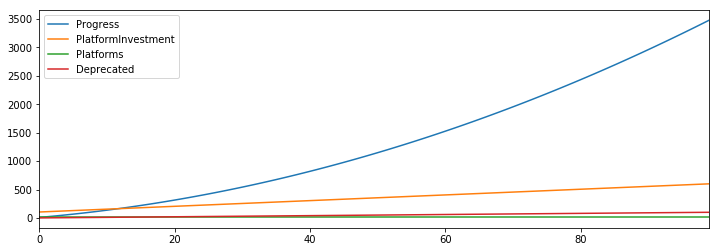

In [42]:
spec = """
PlatformInvestment(100)
Platforms(10)
[Potential] > Platforms @ 1
Platforms > Deprecated @ 1
[Potential] > PlatformInvestment @ 5
[Potential] > Progress @ PlatformInvestment / Platforms
"""
rounds=100
render(spec, rounds=rounds, columns=['Progress', 'PlatformInvestment', 'Platforms', 'Deprecated'])
table(spec, rounds=rounds, start=-10)

In [ ]:
spec = """
PlatformInvestment(100)
Platforms(10)
[Potential] > Platforms @ 1
Platforms > Deprecated @ 1
[Potential] > PlatformInvestment @ 5
[Potential] > Progress @ PlatformInvestment / Platforms
"""
rounds=100
render(spec, rounds=rounds, columns=['Progress', 'PlatformInvestment', 'Platforms', 'Deprecated'])
table(spec, rounds=rounds, start=-10)

Round,PlatformInvestment,Platforms,InvestmentRate,Deprecated,Progress
0,4650,10,96,91,15106.000000000002
1,4746,10,97,92,15571.000000000002
2,4843,10,98,93,16045.600000000002
3,4941,10,99,94,16529.9
4,5040,10,100,95,17024.0
5,5140,10,101,96,17528.0
6,5241,10,102,97,18042.0
7,5343,10,103,98,18566.1
8,5446,10,104,99,19100.399999999998
9,5550,10,105,100,19644.999999999996


<Figure size 432x288 with 0 Axes>

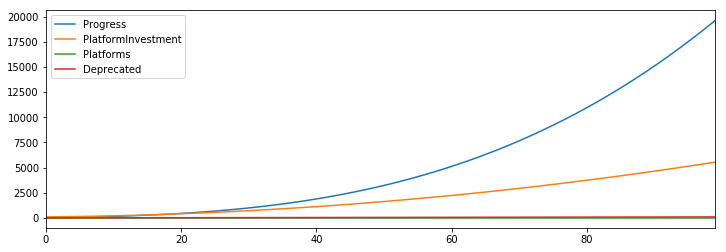

In [43]:
spec = """
PlatformInvestment(100)
Platforms(10)
InvestmentRate(5)
[Potential] > Platforms @ 1
Platforms > Deprecated @ 1
[Potential] > InvestmentRate @ 1
[Potential] > PlatformInvestment @ InvestmentRate
[Potential] > Progress @ PlatformInvestment / Platforms
"""
rounds=100
render(spec, rounds=rounds, columns=['Progress', 'PlatformInvestment', 'Platforms', 'Deprecated'])
table(spec, rounds=rounds, start=-10)

<Figure size 432x288 with 0 Axes>

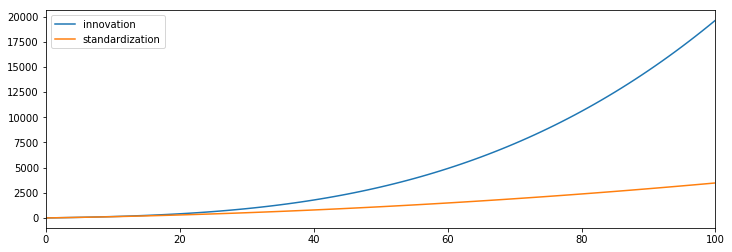

In [45]:
spec_a = """
PlatformInvestment(100)
Platforms(10)
InvestmentRate(5)
[Potential] > Platforms @ 1
Platforms > Deprecated @ 1
[Potential] > InvestmentRate @ 1
[Potential] > PlatformInvestment @ InvestmentRate
[Potential] > Progress @ PlatformInvestment / Platforms
"""

spec_b = """
PlatformInvestment(100)
Platforms(10)
InvestmentRate(5)
[Potential] > PlatformInvestment @ InvestmentRate
[Potential] > Progress @ PlatformInvestment / Platforms
"""

rounds=100
compare(('innovation', spec_a), ('standardization', spec_b), "Progress", rounds=rounds)

<Figure size 432x288 with 0 Axes>

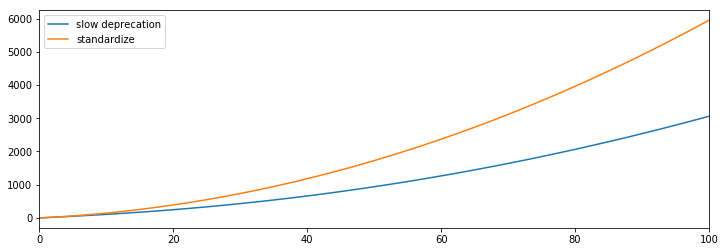

In [49]:
spec_a = """
PlatformInvestment(100)
Platforms(10)
InvestmentRate(10)
[Potential] > Platforms @ 0
Platforms > Deprecated @ 0
[Potential] > PlatformInvestment @ InvestmentRate
[Potential] > Progress @ PlatformInvestment / Platforms
"""

spec_b = """
PlatformInvestment(100)
Platforms(10)
InvestmentRate(10)
[Potential] > Platforms @ 3
Platforms > Deprecated @ 2
[Potential] > InvestmentRate @ 1
[Potential] > PlatformInvestment @ InvestmentRate
[Potential] > Progress @ PlatformInvestment / Platforms
"""

rounds=100
compare(('standardize', spec_a), ('slow deprecation', spec_b), "Progress", rounds=rounds)